In [46]:
%load_ext autoreload
%autoreload 2

import numpy as np

from src.optics.channel_simulation import ChannelSimulator
from src.general_methods.visualizer import Visualizer
from src.deep import file_methods

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


data loaded.
found 3 data sets, showing #0:


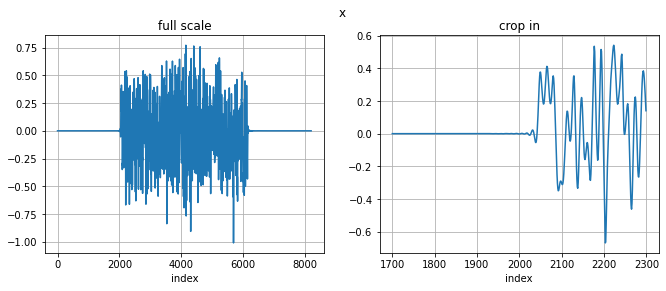

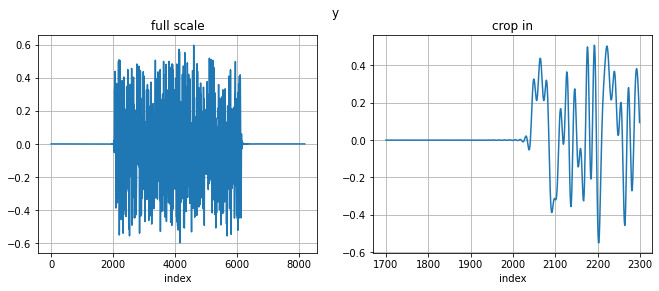

In [41]:
# visual the data of single folder
dir = f'data/qam1024/3_samples_mu=0.0142'
all_x_read, all_y_read, conf_read = file_methods.read_folder(dir)
data_id = 0
print(f'found {len(all_x_read)} data sets, showing #{data_id}:')
zm = range(1700, 2300)
Visualizer.twin_zoom_plot('x', np.real(all_x_read[data_id]), zm)
Visualizer.twin_zoom_plot('y', np.real(all_y_read[data_id]), zm)

In [42]:
# generate cs based on the config
cs = ChannelSimulator.from_dict(conf_read)
print(cs)

{
    "m_qam": 1024,
    "num_symbols": 512,
    "normalization_factor": 0.0142,
    "dt": 1,
    "ssf": {
        "b2": -2e-26,
        "gamma": 0.003,
        "t0": 1.25e-10,
        "dt": 1,
        "z_n": 1000000.0,
        "h": 200
    }
}


In [43]:
dir = f'data/qam1024/3_samples_mu=0.0142'
all_x_read, all_y_read, conf_read = file_methods.read_folder(dir, False)
ber_vec, num_errors = file_methods.calc_ber_for_folder(all_x_read, all_y_read, conf_read)
print(f'the avg ber is {np.mean(ber_vec)}')

data 0 has ber of: 0.172265625 with 882/5120 bit errors
data 1 has ber of: 0.1638671875 with 839/5120 bit errors
data 2 has ber of: 0.17421875 with 892/5120 bit errors
the avg ber is 0.17011718750000002


17it [02:31,  8.94s/it]


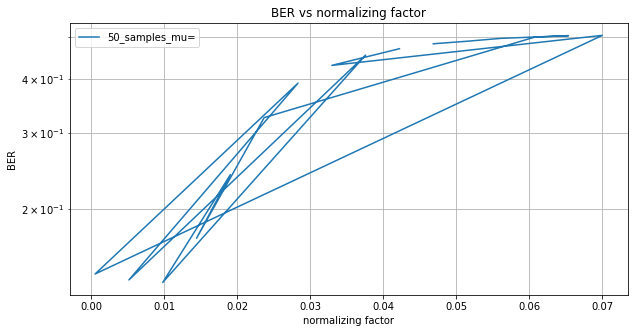

In [48]:
# plot ber vs mu
sub_name = '50_samples_mu='
ber_vec, mu_vec = file_methods.gen_ber_mu_from_folders('data/qam1024_50x16', sub_name, 0)
Visualizer.plot_bers(mu_vec, [ber_vec], [sub_name])

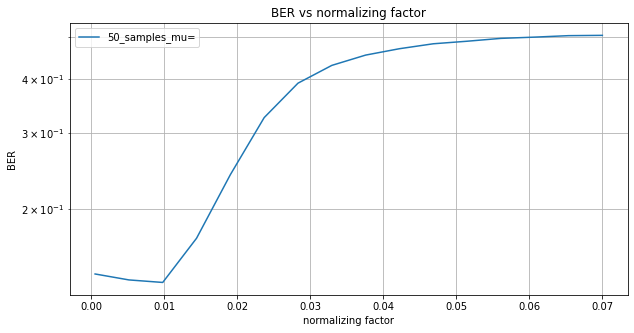

In [49]:
indices = np.argsort(mu_vec)
Visualizer.plot_bers(np.array(mu_vec)[indices], [np.array(ber_vec)[indices]], [sub_name])

In [45]:
# plot ber vs mu
# full debug from folder - read the conf and cycle through entire channel with those data


# dir = f'data/3_samples_mu=0.9'
# _, _, conf_read = file_methods.read_folder(dir)
# cs = ChannelSimulator.from_dict(conf_read)
# cs.verbose = True
# cs.iterate_through_channel()